In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.shape

(32561, 15)

In [10]:

def handle_capital_gain(df):
  df['capital_gain']=np.where(df['capital_gain']==0, np.nan,df['capital_gain'])
  df['capital_gain']=np.log(df['capital_gain'])
  df['capital_gain']= df['capital_gain'].replace(np.nan,0)


In [11]:
handle_capital_gain(df)

In [12]:
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


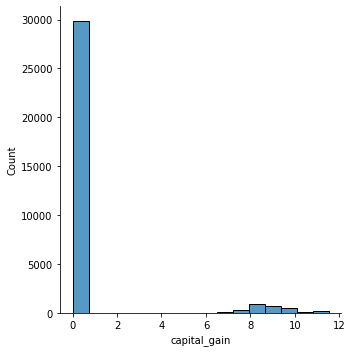

In [13]:
sns.displot(df['capital_gain'])

In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [15]:
df.isnull().sum() # to check which columns have null values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [16]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)



```
# This is formatted as code
```

# Removing outliers from hrs/week


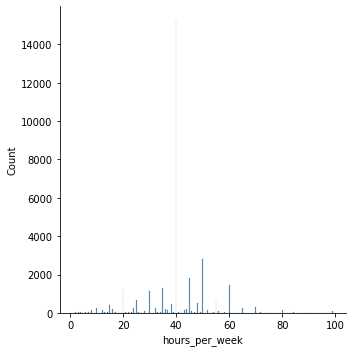

In [17]:
sns.displot(df['hours_per_week']) #distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


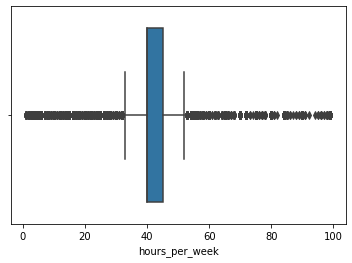

In [18]:
sns.boxplot(df['hours_per_week']) 
#  the minimum, the maximum, the sample median, and the first 
# and third quartiles everything is mentioned in box plot

In [19]:
def remove_outlier_hours_per_week(df):
  IQR= df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)

  lower_range= df['hours_per_week'].quantile(0.25) - (1.5 *IQR)
  upper_range = df['hours_per_week'].quantile(0.75) + (1.5 *IQR)

  df.loc[df['hours_per_week'] <= lower_range,'hours_per_week'] = lower_range
  df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range


In [20]:
remove_outlier_hours_per_week(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


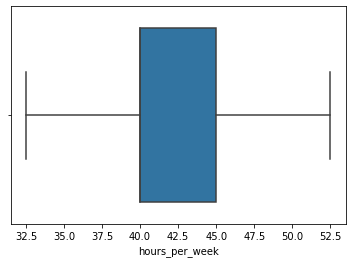

In [21]:
sns.boxplot(df['hours_per_week'])

Removing outliers from education_num


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


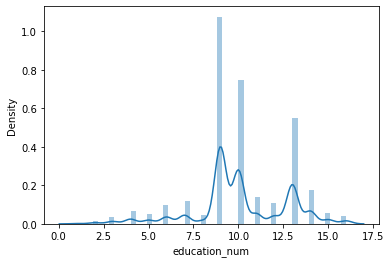

In [22]:
sns.distplot(df['education_num'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


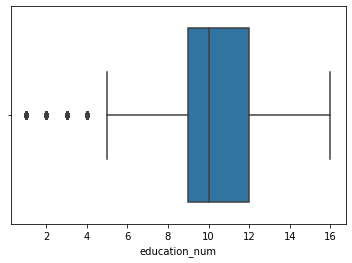

In [23]:
sns.boxplot(df['education_num'])

In [24]:
def remove_outlier_education_num(df):
  IQR= df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)

  lower_range= df['education_num'].quantile(0.25) - (1.5 *IQR)
  upper_range = df['education_num'].quantile(0.75) + (1.5 *IQR)

  df.loc[df['education_num'] <= lower_range,'education_num'] = lower_range
  df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range


In [25]:
remove_outlier_education_num(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


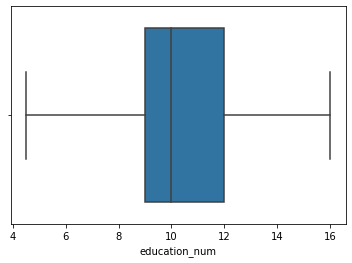

In [26]:
sns.boxplot(df['education_num'])

Removing outliers from capital_loss


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


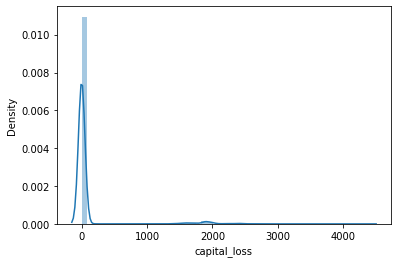

In [27]:
sns.distplot(df['capital_loss'])

In [28]:
def capital_loss_log(df):
    df['capital_loss'] = np.where(df['capital_loss'] == 0, np.nan, df['capital_loss'])
    df['capital_loss'] = np.log(df['capital_loss'])
    df['capital_loss'] = df['capital_loss'].replace(np.nan, 0)
    #removinng null values
    

In [29]:
capital_loss_log(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


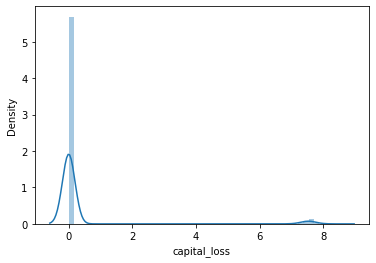

In [30]:
sns.distplot(df['capital_loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


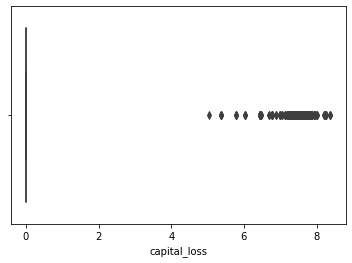

In [31]:
sns.boxplot(df['capital_loss'])

In [32]:
def remove_outlier_capital_loss(df):
    IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    
    lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

In [33]:
remove_outlier_capital_loss(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


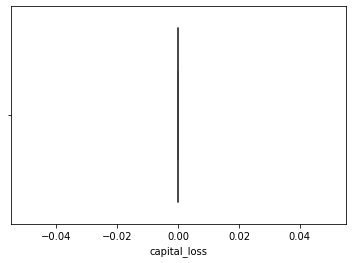

In [34]:
sns.boxplot(df['capital_loss'])

In [58]:
def feature_engineering(df):

  df['salary'] = df['salary'].replace(' >50K', '>50K')
  df['salary'] = np.where(df['salary'] > '50K', 1, 0)
#if male then 1 else 0
  df['sex'] = np.where(df['sex']=="Male", 1,0)

#label encoding in race column
  label_encode_race = {value:key for key, value in enumerate(df['race'].unique())}
  df['race'] = df['race'].map(label_encode_race)


#relation column
  label_encode_relation = {value: key for key, value in enumerate(df['relationship'].unique())}
  df['relationship'] = df['relationship'].map(label_encode_relation)

  ## Replacing ? value with 'Missing'
  df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
 
  label_encode_occupation = {value: key for key, value in enumerate(df['occupation'].unique())}
  df['occupation'] = df['occupation'].map(label_encode_occupation)

  label_encode_marital_status = {value: key for key, value in enumerate(df['marital_status'].unique())}
  df['marital_status'] = df['marital_status'].map(label_encode_marital_status)


  label_encode_edu = {value: key for key, value in enumerate(df['education'].unique())}
  df['education'] = df['education'].map(label_encode_edu)

  df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
  label_encode_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
  df['workclass'] = df['workclass'].map(label_encode_workclass)

  df['native_country'] = np.where(df['native_country'] == ' ?', 'Missing', df['native_country'])
  label_enco_workclass = {value: key for key, value in enumerate(df['native_country'].unique())}
  df['native_country'] = df['native_country'].map(label_enco_workclass)

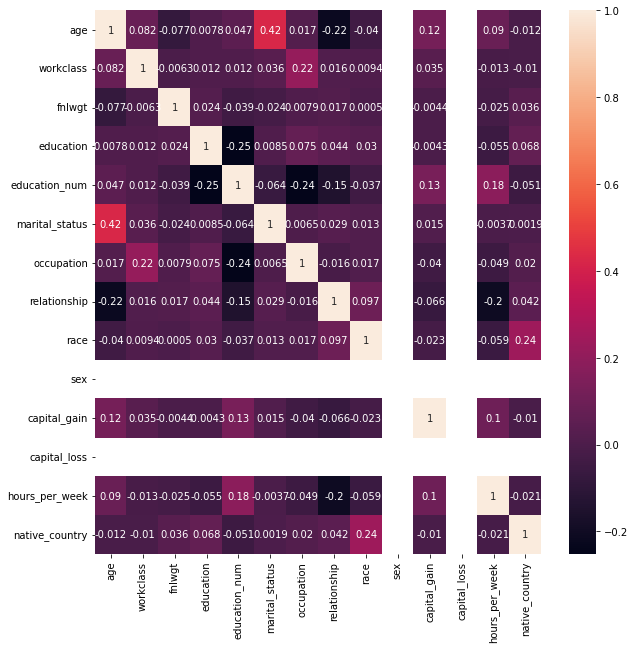

In [59]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [60]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [61]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,<=50K
1,50,1,83311,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,<=50K
2,38,2,215646,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,<=50K
3,53,2,234721,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,<=50K
4,28,2,338409,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,<=50K




```
# This is formatted as code
```

# After feature engineering

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
feature_engineering(df)

In [63]:
df.head

<bound method NDFrame.head of        age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          0   77516          0           13.0               0   
1       50          1   83311          0           13.0               1   
2       38          2  215646          1            9.0               2   
3       53          2  234721          2            7.0               1   
4       28          2  338409          0           13.0               1   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          6           12.0               1   
32557   40          2  154374          1            9.0               1   
32558   58          2  151910          1            9.0               6   
32559   22          2  201490          1            9.0               0   
32560   52          6  287927          1            9.0               1   

       occupation  relationship  race  sex  capital_gain  capital_los

In [42]:
sc= StandardScaler()

In [43]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [64]:
y=df['salary']

In [45]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [65]:
X = sc.fit_transform(X) #for transforming and giving values

In [66]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [75]:
print("train data shape: {}".format(X_train.shape))
print("test data shape: {} ".format(X_test.shape))

train data shape: (26048, 13)
test data shape: (6513, 13) 


In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lg_model = LogisticRegression()

In [78]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [79]:
y_prediction= lg_model.predict(X_test)

In [80]:
result = {
    'Actual':y_test,
    'Predicted':y_prediction
}

In [81]:
pd.DataFrame(result)

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,0
5667,0,0
7827,0,1
...,...,...
1338,0,1
24534,1,0
18080,1,1
10354,0,0


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [87]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_prediction)))
print("Confusion matrix: \n {}".format(confusion_matrix(y_test,y_prediction)))
print("Clasification report: \n{}".format(classification_report(y_test,y_prediction)))

Accuracy Score: 0.8083832335329342
Confusion matrix: 
 [[4624  318]
 [ 930  641]]
Clasification report: 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4942
           1       0.67      0.41      0.51      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.67      0.69      6513
weighted avg       0.79      0.81      0.79      6513

